In [8]:
import dill
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

with open("../results/tone_1.kHz-default-2024-05-16T01:31:34.2.pic", "rb") as f:
    default_result = dill.load(f, ignore="True")

with open("../results/tone_1.kHz-no_inh-2024-05-16T01:47:44.6.pic", "rb") as f:
    no_inh_result = dill.load(f, ignore="True")


In [31]:
def draw_rate_vs_angle(data):
    angle_to_rate = data["angle_to_rate"]
    name = data["conf"]["model_desc"]["name"]
    orig_angles = angle_to_rate.keys()
    angles = [-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90]
    result = {}
    for bad,good in zip(orig_angles,angles):
        result[good] = angle_to_rate[bad]

    arr_n_spikes_r_lso = [x["n_spikes_r_lso"] for angle, x in result.items()]
    print(arr_n_spikes_r_lso)
    arr_n_spikes_l_lso = [x["n_spikes_l_lso"] for angle, x in result.items()]
    arr_n_spikes_r_mso = [x["n_spikes_r_mso"] for angle, x in result.items()]
    arr_n_spikes_l_mso = [x["n_spikes_l_mso"] for angle, x in result.items()]
    fig, [lso, mso] = plt.subplots(2, 1)
    print(name)


    lso.scatter(angles, arr_n_spikes_r_lso, label="right lso")
    # lso.plot(np.arange(200), interp_r_lso(np.arange(200)), 'c')
    lso.scatter(angles, arr_n_spikes_l_lso, label="left lso")
    # lso.plot(np.arange(200), interp_l_lso(np.arange(200)), 'orange')
    lso.set_ylabel("total spikes")
    _ = lso.legend()

    mso.scatter(angles, arr_n_spikes_r_mso, label="right mso")
    # mso.plot(np.arange(200), interp_r_mso(np.arange(200)), 'c')
    mso.scatter(angles, arr_n_spikes_l_mso, label="left mso")
    # mso.plot(np.arange(200), interp_l_mso(np.arange(200)), 'orange')
    mso.set_xlabel("sound position")
    mso.set_ylabel("total spikes")
    _ = mso.legend()

In [2]:
# interp_r_lso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_r_lso)
# interp_l_lso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_l_lso)
# interp_r_mso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_r_mso)
# interp_l_mso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_l_mso)

[112, 118, 110, 108, 108, 102, 91, 86, 73, 73, 81, 93, 80]
default
[206, 215, 211, 188, 181, 183, 179, 183, 215, 217, 218, 228, 222]
no_inh


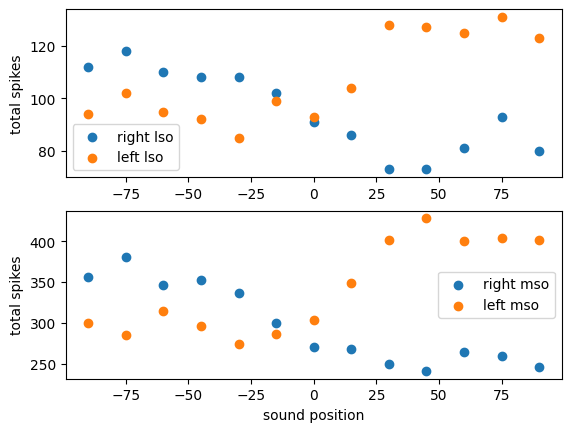

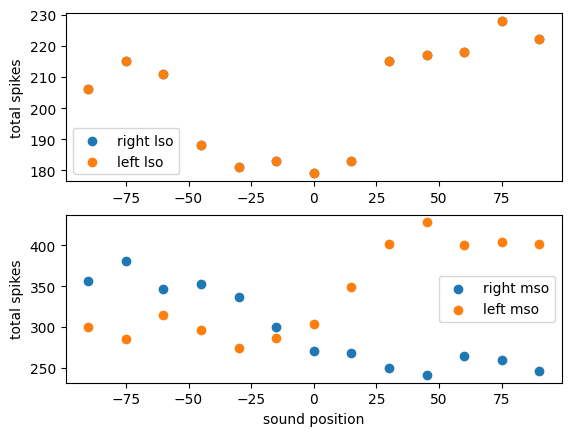

In [32]:
draw_rate_vs_angle(default_result)
draw_rate_vs_angle(no_inh_result)
